IMPORTING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt

GENERATING RANDOM DATASET

In [2]:
X = 3 * np.random.rand(100, 1) #100 rows and 1 column
y = 5 + 2 * X + np.random.randn(100, 1)

USING THE NORMAL EQUATION

In [3]:
X_b = np.c_[np.ones((100,1)),X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.78339557],
       [2.05444957]])

MAKING PREDICTION

In [4]:
X_new = np.array([[0],[3]])
X_new_b = np.c_[np.ones((2,1)),X_new]
Y_predict = X_new_b.dot(theta_best)
Y_predict

array([[ 4.78339557],
       [10.94674427]])

PLOTTING

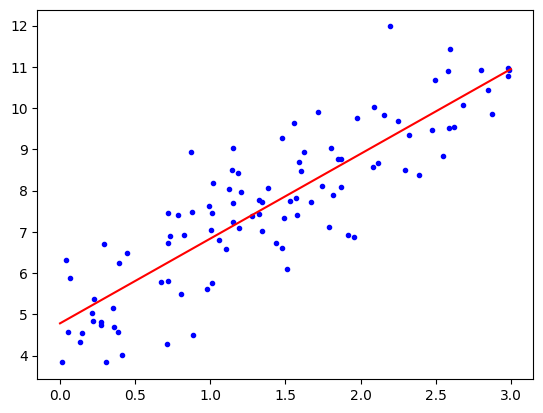

In [5]:
plt.plot(X,y,"b.")
plt.plot(X_new,Y_predict,"r-")
plt.show()

USING THE INBUILT METHOD

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.78339557]), array([[2.05444957]]))

In [7]:
lin_reg.predict(X_new)

array([[ 4.78339557],
       [10.94674427]])

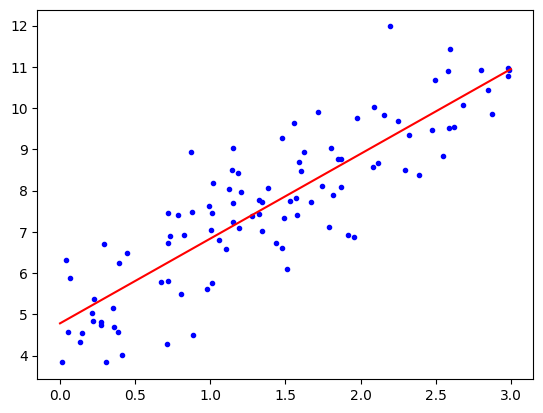

In [8]:
plt.plot(X,y,"b.")
plt.plot(X_new,Y_predict,"r-")
plt.show()

PCA

IMPORTING NECESSARY LIBRARIES

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

READING THE DATASET

In [10]:
data = pd.read_csv("data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


DROPPING THE UNNECESSARY COLUMNS

In [11]:
features=data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)
target = data["diagnosis"]

In [12]:
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


PERFORMING SCALING ON THE DATA

In [13]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

PERFORM PCA

In [14]:
pca = PCA(n_components = 4)
principalComponents = pca.fit_transform(features)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4'])

In [15]:
principalComponents

array([[ 9.19283681,  1.94858308, -1.12316607,  3.63369001],
       [ 2.38780178, -3.76817172, -0.52929142,  1.11822278],
       [ 5.73389629, -1.07517381, -0.5517482 ,  0.91210096],
       ...,
       [ 1.25617928, -1.90229672,  0.56273042, -2.08921212],
       [10.37479407,  1.6720101 , -1.87702981, -2.35599972],
       [-5.47524331, -0.67063679,  1.49044274, -2.29917968]])

COMBINE THE TARGET AND THE PRINCIPAL COMPONENTS

In [16]:
newDataframe = pd.concat([principalDataframe, target],axis = 1)
newDataframe

,PC1,PC2,PC3,PC4,diagnosis
0,9.192837,1.948583,-1.123166,3.633690,M
1,2.387802,-3.768172,-0.529291,1.118223,M
2,5.733896,-1.075174,-0.551748,0.912101,M
3,7.122953,10.275589,-3.232789,0.152510,M
4,3.935302,-1.948072,1.389767,2.940632,M
...,...,...,...,...,...
564,6.439315,-3.576817,2.459486,1.177322,M
565,3.793382,-3.584048,2.088477,-2.506035,M
566,1.256179,-1.902297,0.562730,-2.089212,M
567,10.374794,1.672010,-1.877030,-2.356000,M


EXPLAINING THE VARIANCE USING PRINCIPAL COMPONENT

In [17]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135])